<a href="https://colab.research.google.com/github/Agnessy-ai/deep-learning-image-recognition-3808126/blob/main/SocialNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#### Question 1

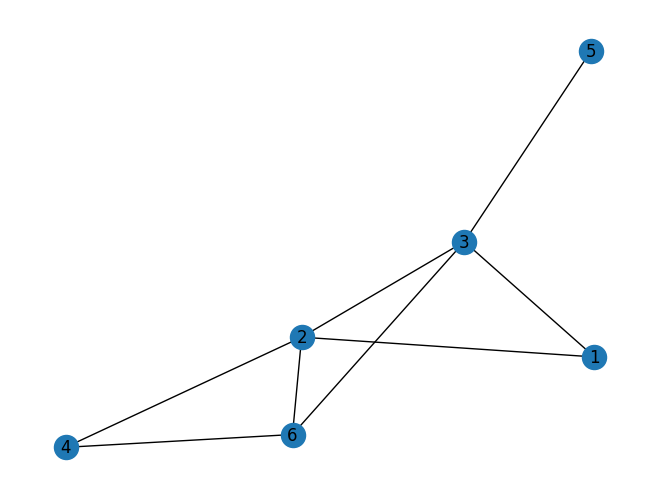

In [2]:
# 1a
A = np.array([
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 1, 0, 1],
    [1, 1, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0]
    ])

G = nx.from_numpy_array(A)
# update nodes list to start from 1 to 6

G = nx.relabel_nodes(G, {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6})
nx.draw(G, with_labels=True)


1b

Degree Sequence


|Node     | Degree  |
|---------|---------|
|1        |2        |
|2        |4        |
|3        |4        |
|4        |2        |
|5        |1        |
|6        |3        |

Degree Distribution

![image.png](attachment:image.png)

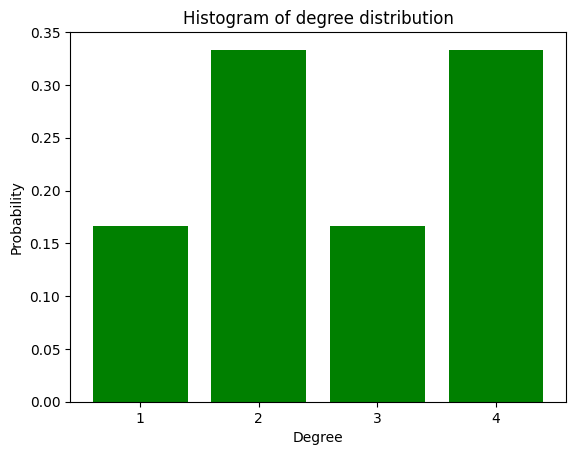

In [8]:
# 1b
deg = [d for n,d in nx.degree(G)]
uni_deg, count = np.unique(deg, return_counts = True)
uni_deg, count
prob = count/sum(count)
plt.bar(uni_deg, prob, color = 'green')
plt.title('Histogram of degree distribution')
plt.xlabel('Degree')
plt.xticks(uni_deg)
plt.ylabel('Probability')
plt.show()

In [4]:
# 1c
link_list = {
    1: [2, 3],
    2: [1, 3, 4, 6],
    3: [1, 2, 5, 6],
    4: [2, 6],
    5: [3],
    6: [2, 3, 4]
}


#------------------------------
print("\nLink List (Edge List):", link_list)


Link List (Edge List): {1: [2, 3], 2: [1, 3, 4, 6], 3: [1, 2, 5, 6], 4: [2, 6], 5: [3], 6: [2, 3, 4]}


In [5]:
# 1d

average_clustering_coefficient = nx.average_clustering(G)
print("average_clustering_coefficient", average_clustering_coefficient)

average_clustering_coefficient 0.5833333333333333


In [6]:
# 1e

A1 = np.array([
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 1, 1, 0],
    [1, 1, 0, 0, 1, 1],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 0],  # 5th row swapped with 6
    [0, 0, 1, 0, 0, 0]   # 6th row swapped with 5
    ])

link_list1 = {
    1: [2, 3],
    2: [1, 3, 4, 5],
    3: [1, 2, 5, 6],
    4: [2, 5],
    5: [2, 3, 4],  # 5th row swapped with 6
    6: [3]  # 6th row swapped with 4
}



1f

From the link list alone, it can be less obvious if there are isolated nodes (with no edges) or self-loops, unless you explicitly check. An adjacency matrix provides a quick, global view of all node-to-node connections (including 0s for non-edges), making it easier to see the entire connectivity structure at once, including potential self-loops on the diagonal.


1g

There is 6 paths of length 3 starting from node 1 and ending at node 3.

In [7]:
acube = A @ A @ A

acube[0, 2]

np.int64(6)

1h

There are 12 cycles of length 4 in the network

***
#### Question 2

In [ ]:
B = nx.Graph()
fans = ['A', 'B', 'C', 'D', 'E']
basketball_teams = [1, 2, 3, 4]

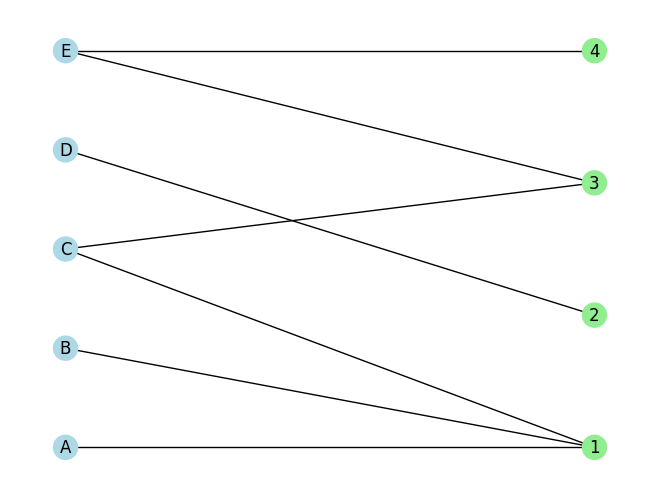

In [ ]:
# 2a
B.add_nodes_from(fans, bipartite=0)
B.add_nodes_from(basketball_teams, bipartite=1)
B.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

pos = nx.bipartite_layout(B, fans)

# Draw the bipartite graph
nx.draw(B, pos, with_labels=True, node_color=['lightblue' if node in fans else 'lightgreen' for node in B.nodes()])
plt.show()

In [ ]:
# 2b
Ab = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 1, 0],
               [0, 0, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 1, 1],
               [1, 1, 1, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 1, 0, 1, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 0, 0, 0, 0]])
print("Bipartite adjacency matrix:\n", Ab)

Bipartite adjacency matrix:
 [[0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1]
 [1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]


Fans Projected Graph [[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [0 0 0 0 0]
 [0 0 1 0 0]]
Teams Projected Graph [[0 0 1 0]
 [0 0 0 0]
 [1 0 0 1]
 [0 0 1 0]]


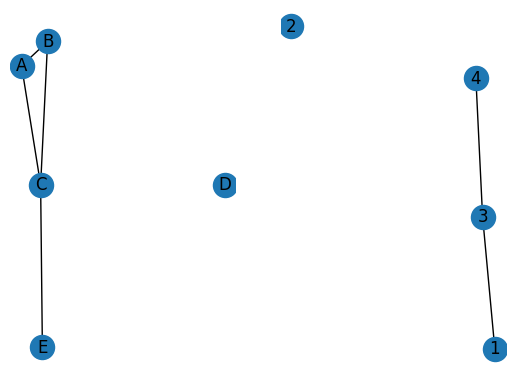

In [ ]:
# 2c
fan_projection = nx.bipartite.projected_graph(B, fans)
print('Fans Projected Graph', nx.adjacency_matrix(fan_projection).todense())

team_projection= nx.bipartite.projected_graph(B, basketball_teams)
print('Teams Projected Graph', nx.adjacency_matrix(team_projection).todense())

plt.subplot(1, 2, 1)
nx.draw(fan_projection, with_labels=True)
plt.subplot(1, 2, 2)
nx.draw(team_projection, with_labels=True)
plt.show()

In [ ]:
list(dict(fan_projection.degree()).values())

[2, 2, 3, 0, 1]

In [ ]:
# 2d
average_degree_green_nodes = np.mean(list(dict(fan_projection.degree()).values()))
average_degree_red_nodes = np.mean(list(dict(team_projection.degree()).values()))

print("Average degree of green nodes:", average_degree_green_nodes)
print("Average degree of red nodes:", average_degree_red_nodes)

Average degree of green nodes: 1.6
Average degree of red nodes: 1.0


#### Question 4

Number of nodes: 62
Number of edges: 159
Max degree: 12
Min degree: 1
Max degree: 12
Triangles: 95
Average triangles: 4.596774193548387
Fraction of closed triangles: 0.3087757313109426


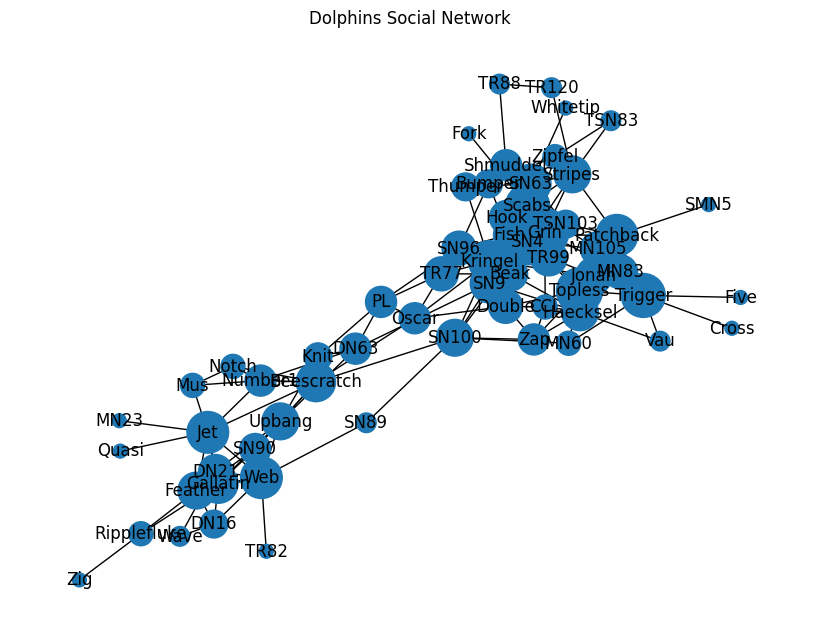

In [ ]:
# Load the Dolphins network
dolphins = nx.read_gml("dolphins.gml")

# (a) Compute key characteristics
num_nodes = dolphins.number_of_nodes()
num_edges = dolphins.number_of_edges()
degree_dict = dict(dolphins.degree())
max_degree = max(degree_dict.values())
min_degree = min(degree_dict.values())
triangles = sum(nx.triangles(dolphins).values()) // 3
avg_triangles = np.mean(list(nx.triangles(dolphins).values()))
fraction_closed_triangles = nx.transitivity(dolphins)

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("Max degree:", max_degree)
print("Min degree:", min_degree)
print("Max degree:", max_degree)
print("Triangles:", triangles)
print("Average triangles:", avg_triangles)
print("Fraction of closed triangles:", fraction_closed_triangles)

# Visualize network with node size proportional to degree
plt.figure(figsize=(8, 6))
nx.draw(dolphins, with_labels=True, node_size=[v * 100 for v in degree_dict.values()])
plt.title("Dolphins Social Network")
plt.show()

In [ ]:
# node list
print("Node List:", list(G.nodes()))

# edge list
print("Edge List:", list(G.edges()))

# degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print("Degree Sequence:", degree_sequence)

# average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G)
print("Average Clustering Coefficient:", average_clustering_coefficient)

# average shortest path
average_shortest_path = nx.average_shortest_path_length(G)
print("Average Shortest Path:", average_shortest_path)

# diameter
diameter = nx.diameter(G)
print("Diameter:", diameter)

# clustering coefficient
clustering_coefficient = nx.clustering(G)
print("Clustering Coefficient:", clustering_coefficient)

# degree distribution
degree_distribution = nx.degree_histogram(G)
print("Degree Distribution:", degree_distribution)

# degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# closeness centralit
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness_centrality)

# betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)





Node List: ['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
Edge List: [('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('

In [ ]:
# (b) Edge density: Own implementation
def edge_density(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    return 2 * m / (n * (n - 1))

density_own = edge_density(dolphins)
density_nx = nx.density(dolphins)
print("Edge Density (Own):", density_own)
print("Edge Density (NetworkX):", density_nx)

Edge Density (Own): 0.08408249603384453
Edge Density (NetworkX): 0.08408249603384453


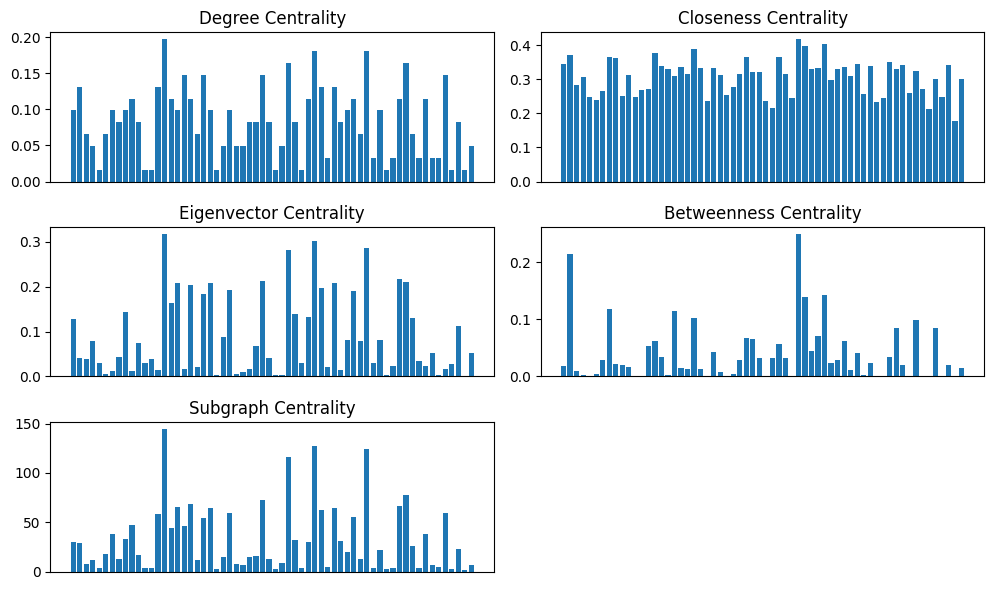

In [ ]:
# (c) Compute and plot centrality measures
centralities = {
    "Degree Centrality": nx.degree_centrality(dolphins),
    "Closeness Centrality": nx.closeness_centrality(dolphins),
    "Eigenvector Centrality": nx.eigenvector_centrality(dolphins),
    "Betweenness Centrality": nx.betweenness_centrality(dolphins),
    "Subgraph Centrality": nx.subgraph_centrality(dolphins)
}

plt.figure(figsize=(10, 6))
for i, (name, centrality) in enumerate(centralities.items()):
    plt.subplot(3, 2, i + 1)
    plt.bar(centrality.keys(), centrality.values())
    plt.title(name)
    plt.xticks([])
plt.tight_layout()
plt.show()

In [ ]:
# (d) Clustering coefficient
clustering_own = np.mean(list(nx.clustering(dolphins).values()))
clustering_nx = nx.average_clustering(dolphins)
print("Clustering Coefficient (Own):", clustering_own)
print("Clustering Coefficient (NetworkX):", clustering_nx)

Clustering Coefficient (Own): 0.2589582460550202
Clustering Coefficient (NetworkX): 0.2589582460550202


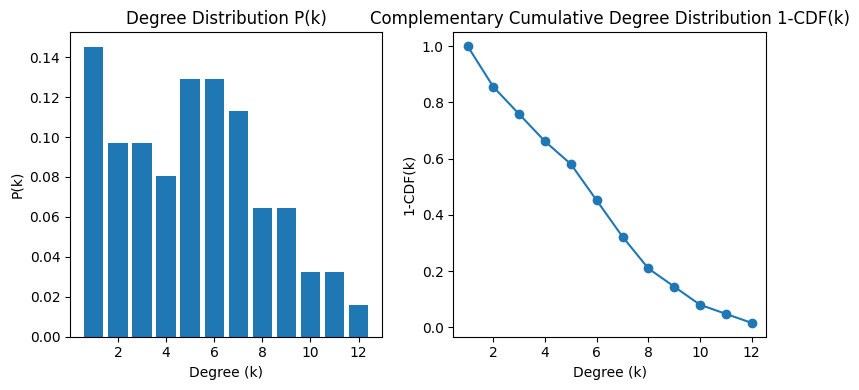

In [ ]:
# (e) Degree distribution and Complementary CDF
degree_vals = np.array(list(degree_dict.values()))
k_vals, counts = np.unique(degree_vals, return_counts=True)
p_k = counts / num_nodes
cdf = np.cumsum(p_k[::-1])[::-1]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(k_vals, p_k)
plt.title("Degree Distribution P(k)")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")

plt.subplot(1, 2, 2)
plt.plot(k_vals, cdf, marker="o")
plt.title("Complementary Cumulative Degree Distribution 1-CDF(k)")
plt.xlabel("Degree (k)")
plt.ylabel("1-CDF(k)")

plt.tight_layout()
plt.show()

In [ ]:
# (f) Average shortest path length
avg_shortest_path = nx.average_shortest_path_length(dolphins)
print("Average Shortest Path Length:", avg_shortest_path)

Average Shortest Path Length: 3.3569539925965097


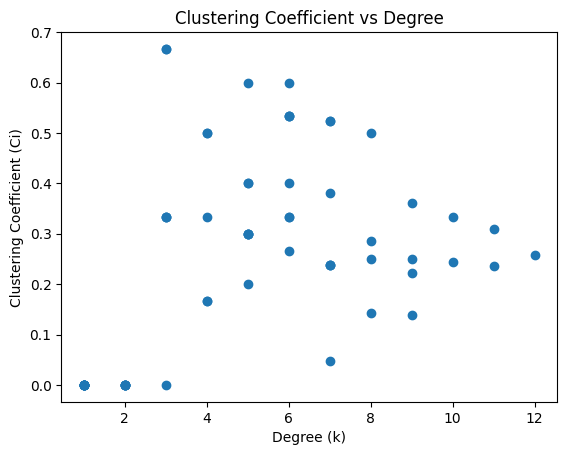

In [ ]:
# (g) Scatter plot of clustering coefficient vs degree
clustering_coeffs = nx.clustering(dolphins)
plt.scatter(degree_dict.values(), clustering_coeffs.values())
plt.xlabel("Degree (k)")
plt.ylabel("Clustering Coefficient (Ci)")
plt.title("Clustering Coefficient vs Degree")
plt.show()